## Demo Skript to determine single pictures of bunnies from group photos

In [2]:
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" 

import matplotlib.pyplot as plt


# Add the project root to sys.path so 'config' can be imported
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
import torch
from torchvision import transforms

from PIL import Image
import pytorch_lightning as pl

from config.load_configuration import load_configuration
config = load_configuration()

from preprocessing import get_rabbit_boxes, save_rabbit_crops, get_animals

from utils.scraper import remove_visual_duplicates

pl.seed_everything(config['seed'])
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"   # disable oneDNN optimizations for reproducibility

# import the model
# This is a pre-trained Faster R-CNN model with a ResNet-50 backbone
import torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

Seed set to 42


PC Name: DESKTOP-LUKAS
Loaded configuration from ../config/config_lukas.yaml


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [6]:
base_path = config['path_to_data']
base_pathToBunnies = base_path + r"\dataset_aufgabe2_Pruefung\test"
base_target_path = base_path + r"\dataset_aufgabe2_Pruefung\test\_Cropped"  # Directory to save cropped images

folder_names = ["Other"]
for folder_name in folder_names:
    pathToBunnies = os.path.join(base_pathToBunnies, folder_name)
    target_path = os.path.join(base_target_path, folder_name)
    for filename in os.listdir(pathToBunnies):
        if filename.lower().endswith('.mov'):
            os.remove(os.path.join(pathToBunnies, filename))
            continue
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            continue
        file_path = os.path.join(pathToBunnies, filename)
        save_rabbit_crops(file_path, target_path, border=30)

No rabbit-like objects found in IMG_5733_nok. No crops available.


In [3]:
get_animals(Image.open(r'D:\HKA_IMS_Drive\SS25_MSYS_KAER-AI-PoseAct\21_Test_Data\Backup_LukaMarie\Apollo\IMG_8691.jpg').convert("RGB"), 0.4)

([23, 16, 16], [0.938747763633728, 0.8751223087310791, 0.7635149359703064])

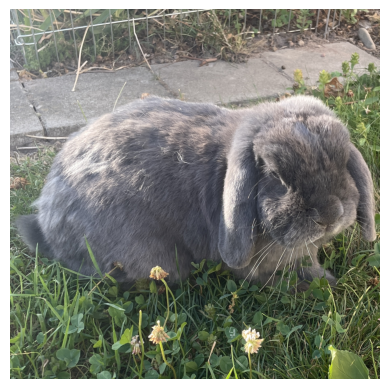

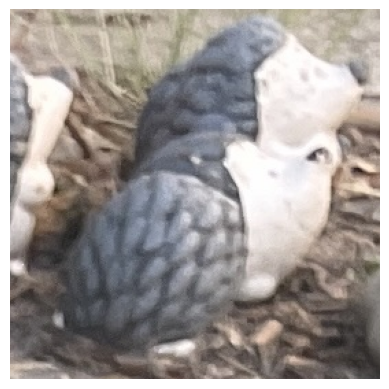

In [4]:
images = save_rabbit_crops(r'D:\HKA_IMS_Drive\SS25_MSYS_KAER-AI-PoseAct\21_Test_Data\Backup_LukaMarie\Apollo\IMG_8691.jpg')

for img in images:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Remove Duplicates
Remove what seems to be duplicates from the folders with Marie's function

In [8]:
# base_path = r"D:\HKA_IMS_Drive\SS25_MSYS_KAER-AI-PoseAct\21_Test_Data\dataset_aufgabe2_cropped_wo_duplicates"  # Directory to save cropped images
base_path = r"D:\HKA_IMS_Drive\SS25_MSYS_KAER-AI-PoseAct\21_Test_Data\dataset_aufgabe2_cropped_wo_duplicates"
base_path = config['path_to_exam_data_a2'] + r'/test/'
subdirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

for subdir in subdirs:
    remove_visual_duplicates(folder=os.path.join(base_path, subdir),threshold=11)


 0 duplicate(s) deleted from C:\Users\lukas\SynologyDrive_IMS/SS25_MSYS_KAER-AI-PoseAct/21_Test_Data/dataset_aufgabe2_Pruefung/test/Other.


In [ ]:
from tqdm import tqdm

def count_occurrences(arrays, allowed_elements):
    counts = {}
    for arr in arrays:
        for elem in arr:
            if elem in allowed_elements:
                counts[elem] = counts.get(elem, 0) + 1
    return counts

folders = ["Apollo", "Helios", "Nyx", "Selene"]  # List of folders to process
base_path = r'D:\HKA_IMS_Drive\SS25_MSYS_KAER-AI-PoseAct\21_Test_Data\Backup_LukaMarie'
# Example usage:
example_arrays = []

for folder in tqdm(folders, desc="Folders"):
    folder_path = os.path.join(base_path, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Processing folder: {folder} with {len(image_files)} images")
    i=0
    for filename in tqdm(image_files, desc=f"{folder}", leave=False):
        file_path = os.path.join(folder_path, filename)
        labels, scores = get_animals(Image.open(file_path).convert("RGB"), 0.4)
        example_arrays.append(labels)
        i=i+1
        if i % 50 == 0:
            print(f"Processed {i} images in {folder}")

occurrences = count_occurrences(example_arrays, [16, 17, 18, 19, 20, 21, 22, 23, 24, 74, 88])
print(occurrences)  # Result on "Backup_Luka_Marie": {23: 137, 16: 64, 21: 3, 18: 222, 20: 60, 17: 78, 88: 2, 22: 1}

Folders:   0%|          | 0/4 [00:00<?, ?it/s]

Processing folder: Apollo with 87 images


Processed 50 images in Apollo


Folders:  25%|██▌       | 1/4 [05:31<16:34, 331.53s/it]

Processing folder: Helios with 83 images


Processed 50 images in Helios


Folders:  50%|█████     | 2/4 [09:31<09:14, 277.45s/it]

Processing folder: Nyx with 43 images


Folders:  75%|███████▌  | 3/4 [11:48<03:33, 213.70s/it]

Processing folder: Selene with 127 images


Processed 50 images in Selene


Processed 100 images in Selene


Folders: 100%|██████████| 4/4 [18:15<00:00, 273.97s/it]

{23: 137, 16: 64, 21: 3, 18: 222, 20: 60, 17: 78, 88: 2, 22: 1}
